# 📊 **Reducing Customer Churn: A Strategic Framework Using Real Data**
## ***Telecom dataset, but the approach mirrors how I’d analyze key drivers of performance at <span style="color:DarkGreen">CORNERSTONE RESEARCH</span>***

Fahad Shahbaz | Georgetown University | fs719@georgetown.edu




We use simple techniques (grouping, mapping, bar charts) to uncover insights on reducing churn, protecting revenue, and growing loyalty:

- **🧭 Contract Type** — Why short-term customers are riskier  
- **🕰️ Tenure** — How early experience makes or breaks loyalty  
- **💸 Price Sensitivity** — Where discounting helps, and where it hurts  

---

# **Part One: Executive Brief**

## *Exhibit 1 — Churn by Contract*
**Framing:** Are short-term customers riskier (churn more) than long-term customers?  
**Decision use:** Pricing strategy, loyalty awards, annual plan incentives.


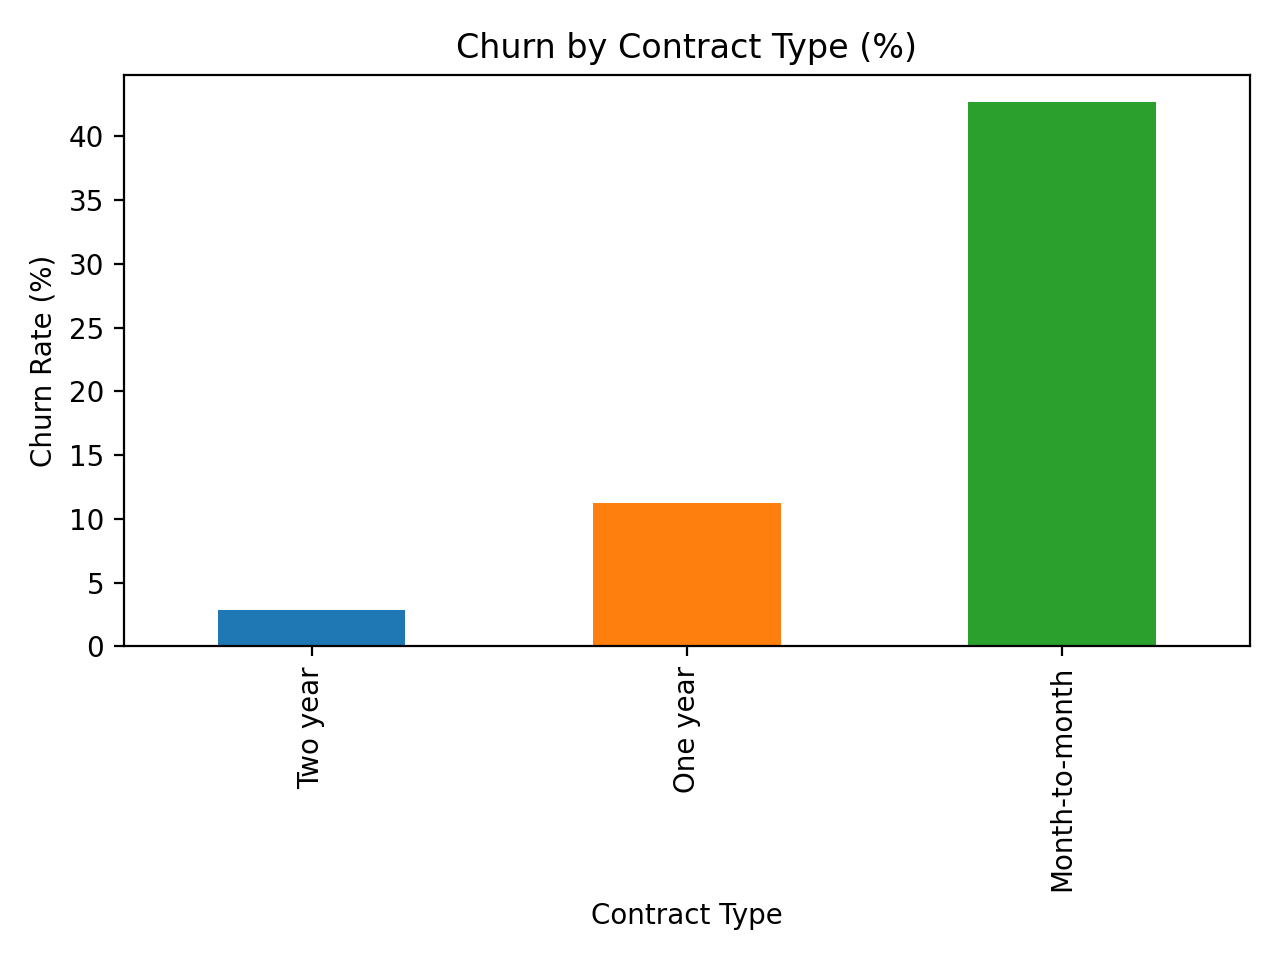

In [18]:
from IPython.display import Image, display
display(Image(filename="figs/churn_by_contract.png", width=600))




## *Exhibit 2 — Churn by Tenure Group*
**Framing:** Are new customers more fragile than loyal, long-tenure ones?  
**Decision use:** Early onboarding, first-90-days success programs.


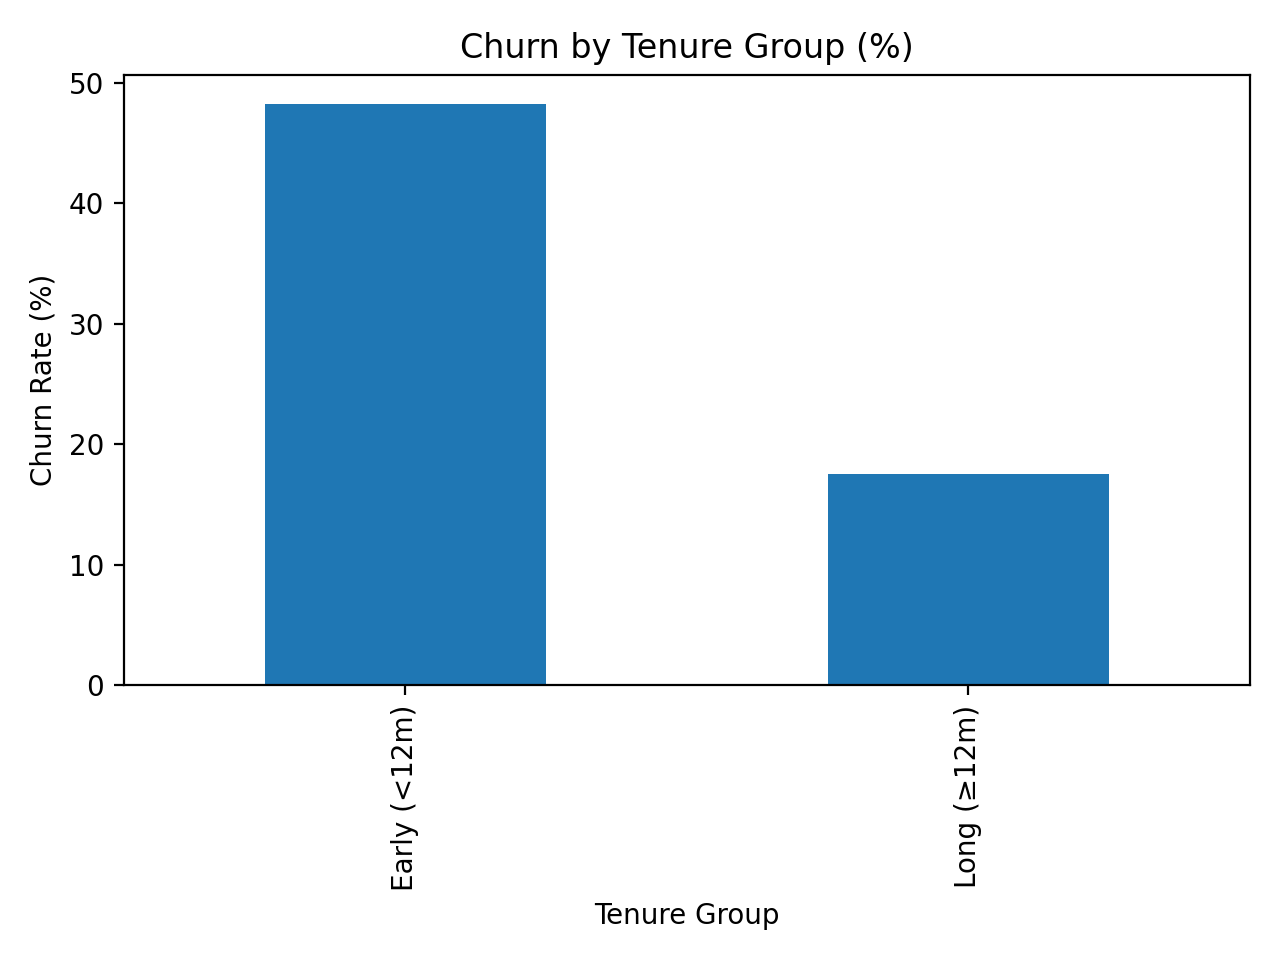

In [11]:
display(Image(filename="figs/churn_by_tenure.png", width=600))


## *Exhibit 3 — Churn by Price Band*
**Framing:** Does churn vary with what customers pay?  
**Decision use:** Smart discounting, retention offers, value add-on targeting.


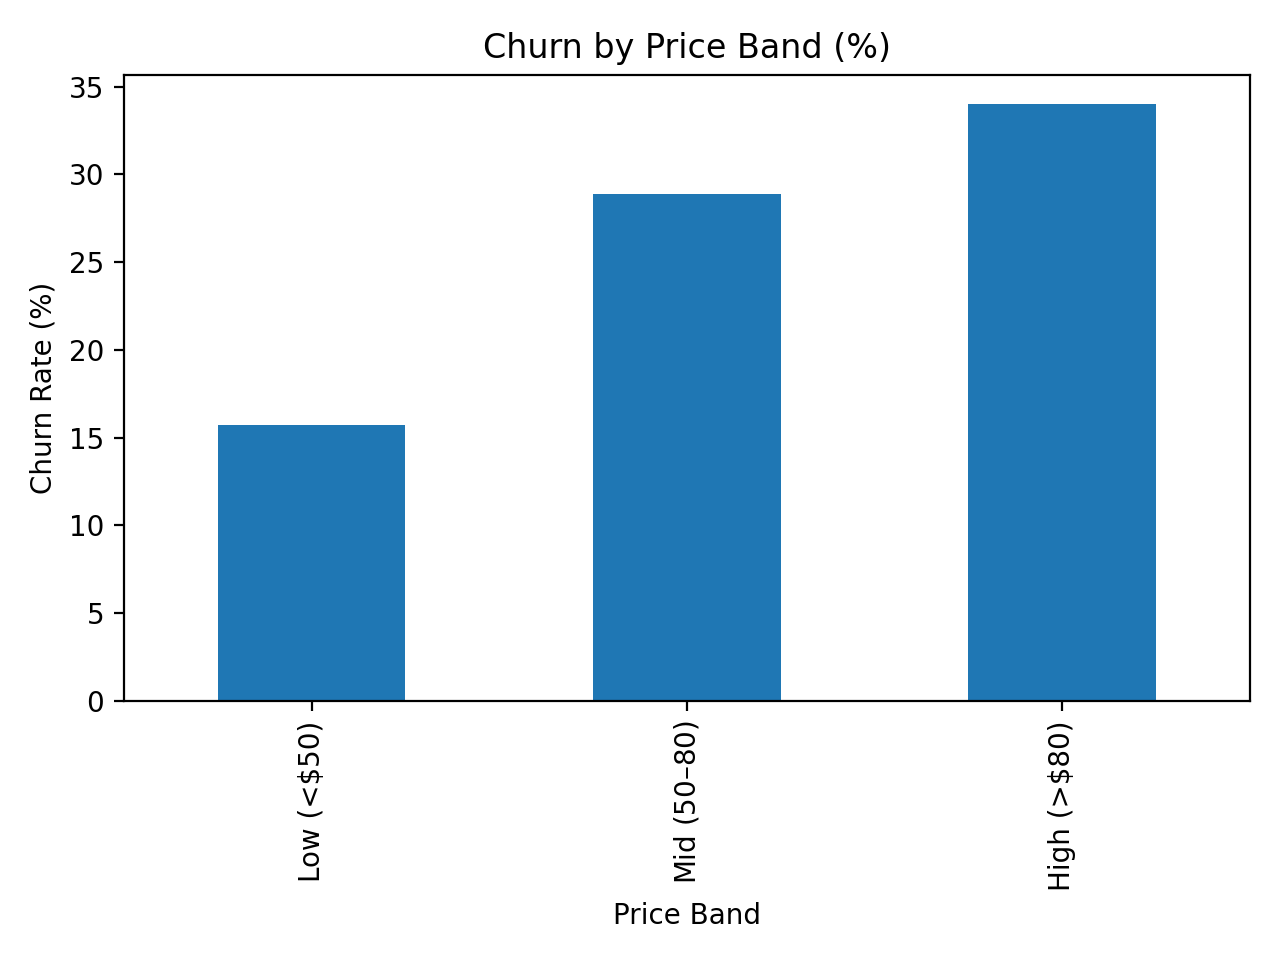

In [12]:
display(Image(filename="figs/churn_by_price.png", width=600))


In [13]:
# ---- Setup
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create folder for saved charts
os.makedirs("figs", exist_ok=True)

# Pandas display hygiene
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 120)

# ---- Load Data
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Quick check
rows, cols = df.shape
print(f"Data loaded: {rows:,} rows × {cols} columns")


Data loaded: 7,043 rows × 21 columns


### 🔍 What we’re asking: How Many Customers Leave?

We start by measuring the overall **churn rate** — how many customers leave, out of everyone.

This helps size the problem and quantify the opportunity. Even a few percentage points of churn reduction can protect meaningful revenue.

**Method:** Turn `Churn` (Yes/No) into 1/0, then take the mean × 100.


In [14]:
# Turn "Yes"/"No" churn into 1/0
df["ChurnNum"] = df["Churn"].map({"Yes": 1, "No": 0})

# Compute churn rate
churn_rate = df["ChurnNum"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.1f}%")


Overall Churn Rate: 26.5%


### 💡 Executive Insight: Why Overall Churn Rate Matters

**Churn is material (~26%):** one in four customers leave.  
Even small improvements here protect major revenue – without needing new client acquisition.

This is the first metric any exec should ask. It tells you how urgent the churn issue is, and how much upside there is in fixing it.


--------------------------------------------------

# **Part Two: Deep Dive**

## *Exhibit 1 – Churn by Contract*

**Framing:** Are short-term customers riskier than long-term?  
**Decision use:** Pricing, loyalty nudges, and plan design.  

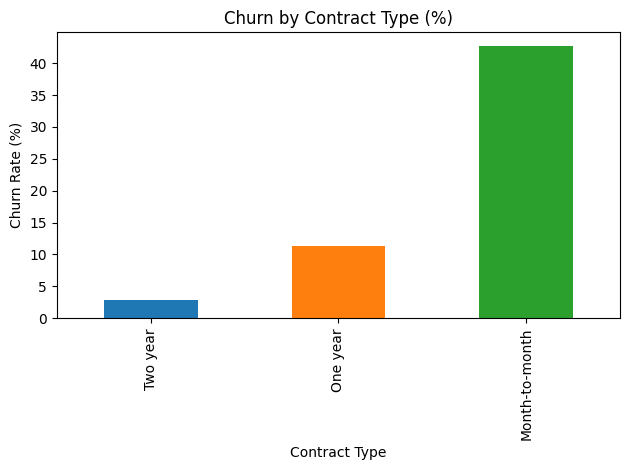

Contract
Two year           2.8
One year          11.3
Month-to-month    42.7
Name: ChurnNum, dtype: float64

In [15]:
# ---- Churn by Contract Type
churn_by_contract = (df.groupby("Contract")["ChurnNum"].mean() * 100).sort_values()

# Plot and save
ax = churn_by_contract.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
ax.set_title("Churn by Contract Type (%)")
ax.set_xlabel("Contract Type")
ax.set_ylabel("Churn Rate (%)")
plt.tight_layout()
plt.savefig("figs/churn_by_contract.png", dpi=200)
plt.show()

# Show exact numbers
churn_by_contract.round(1)


## *Exhibit 2 — Churn by Tenure Group*

**Framing:** Are new customers more fragile than long-tenure customers?  
**Decision use:** Onboarding design, early-life CX, success outreach.  

**Takeaway:** **Month-to-month churn is dramatically higher** than annual contracts.  
**Action:** Incentivize commitment — offer annual nudges, loyalty credits, or proactive support to reduce churn.  


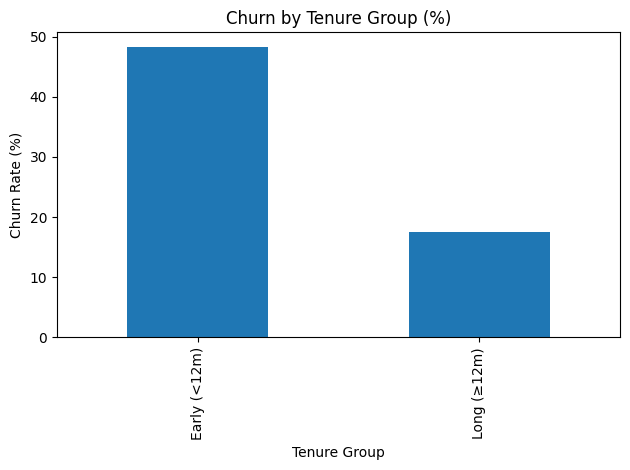

TenureGroup
Early (<12m)    48.3
Long (≥12m)     17.5
Name: ChurnNum, dtype: float64

In [16]:
# Group customers by tenure: under 12 months = "Early", else "Long"
df["TenureGroup"] = df["tenure"].apply(lambda x: "Early (<12m)" if x < 12 else "Long (≥12m)")

# Calculate churn rate for each group
churn_by_tenure = (df.groupby("TenureGroup")["ChurnNum"].mean() * 100).reindex(["Early (<12m)", "Long (≥12m)"])

# Plot and save
ax = churn_by_tenure.plot(kind="bar")
ax.set_title("Churn by Tenure Group (%)")
ax.set_xlabel("Tenure Group")
ax.set_ylabel("Churn Rate (%)")
plt.tight_layout()
plt.savefig("figs/churn_by_tenure.png", dpi=200)
plt.show()

churn_by_tenure.round(1)


**Takeaway:** **Early-life churn is the silent killer** — new customers leave at much higher rates.  
**Action:** Focus on onboarding and support during the first 6–12 months to lock in loyalty early.  


## *Exhibit 3 — Churn by Price Band*

**Framing:** Does churn vary by how much customers pay each month?  
**Branding rationale:** We use intuitive, telecom-style tiers: **<$50**, **$50–$80**, >$80.  
**Decision use:** Identify risk concentration and target offers or support accordingly.  


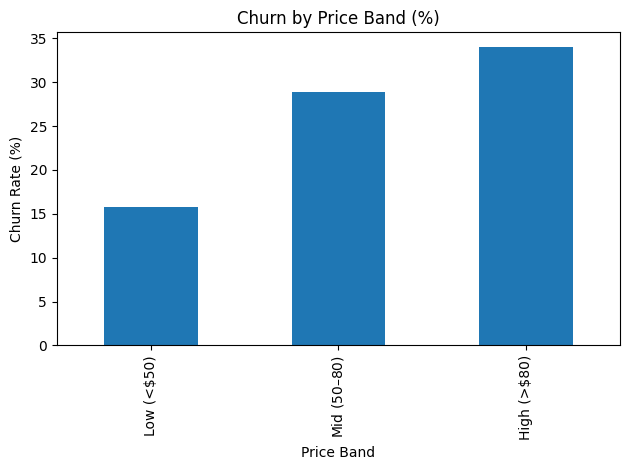

PriceBand
Low (<$50)       15.7
Mid ($50–$80)    28.9
High (>$80)      34.0
Name: ChurnNum, dtype: float64

In [17]:
# Define pricing bands (<$50, $50–$80, >$80)
def price_band(x):
    if x < 50:
        return "Low (<$50)"
    elif x <= 80:
        return "Mid ($50–$80)"
    else:
        return "High (>$80)"

# Apply banding
df["PriceBand"] = df["MonthlyCharges"].apply(price_band)

# Group and calculate churn
churn_by_price = (df.groupby("PriceBand")["ChurnNum"].mean() * 100).reindex(["Low (<$50)", "Mid ($50–$80)", "High (>$80)"])

# Plot and save
ax = churn_by_price.plot(kind="bar")
ax.set_title("Churn by Price Band (%)")
ax.set_xlabel("Price Band")
ax.set_ylabel("Churn Rate (%)")
plt.tight_layout()
plt.savefig("figs/churn_by_price.png", dpi=200)
plt.show()

churn_by_price.round(1)


**Takeaway:** **Churn rises in mid/high price bands** – clear price sensitivity.  
**Action:** Use surgical offers or added value in those bands instead of discounting across the board.  


---
# Executive Summary: Lessons Any Firm Can Use

- **Churn is high (~26%)** → even small improvements protect big revenue.  
- **Least-committed clients leave most** → loyalty incentives or annual nudges help.  
- **New customers are fragile** → the first months are the golden window; strong onboarding reduces quick exits.  
- **Price sensitivity shows up** (optional) → smarter, targeted offers beat blanket discounts.  

**Why this matters:**  
These lessons apply beyond telecom. Banks, consultancies, and financial firms all face the same challenge: protect current clients, build commitment, and focus resources where risk is highest.  

That’s how data turns into strategy and storytelling. 



# Industry Relevance

For <span style="color:DarkGreen; font-weight:bold">CORNERSTONE RESEARCH</span>, these dynamics apply directly: the core challenge isn’t winning new relationships, it’s protecting continuity and deepening long-term commitment:

**Where risk concentrates**: Clients are most likely to disengage when commitment is short, the relationship is new, or the perceived value isn’t clear.

**The strategy**: Make staying the default through longer-term structures, make the early experience unmistakably valuable, and reserve incentives for moments where they actually shift behavior — like retaining a high-risk client or converting a hesitant one.

**Why this matters**: This logic applies across pricing, onboarding, loyalty, and account management – anywhere retention drives value.

**How I’d apply it**: I’d set a consistent and simple review cycle – tracking total exits, early-stage drop-offs, and the share of clients sticking long-term.

**The principle**: The best way to retain more clients is simple: strengthen commitment, win the early weeks, and intervene where the risk is real.